# Explore

Contents:
- Explore the data set

## Notebook parameters

In [1]:
zhbikes_data = '../data/preprocessed/zhbikes.feather'

## Read the preprocessed data

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_feather(zhbikes_data)

/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [6]:
df.head()

,counting_station,datetime,velo_in,velo_out,objectid
0,Y2G13124875,2016-01-29 00:00:00,0.0,0.0,3600899
1,Y2G13124875,2016-01-29 00:15:00,0.0,0.0,3600900
2,Y2G13124875,2016-01-29 00:30:00,0.0,0.0,3600901
3,Y2G13124875,2016-01-29 00:45:00,0.0,0.0,3600902
4,Y2G13124875,2016-01-29 01:00:00,0.0,0.0,3600903


## Question: How many stations do we find in the data?

In [7]:
stations = df['counting_station'].unique()

In [8]:
stations.shape

(22,)

## Let's plot the data for each station over the year of 2017, binning on a weekly basis

In [31]:
def sum_by_week(station):
    df_station = df[df['counting_station'] == station]
    aggregated = df_station.set_index('datetime').resample('1W').agg({'velo_in' : 'sum', 'velo_out': 'sum'}).reset_index()
    aggregated['velo_all'] = aggregated['velo_out'] + aggregated['velo_in']
    aggregated['velo_out'] = -aggregated['velo_out']
    aggregated['counting_station'] = station
    return aggregated

In [32]:
dataframes_weekly = [sum_by_week(station) for station in stations]
df_weekly = pd.concat(dataframes_weekly).reset_index(drop=True)

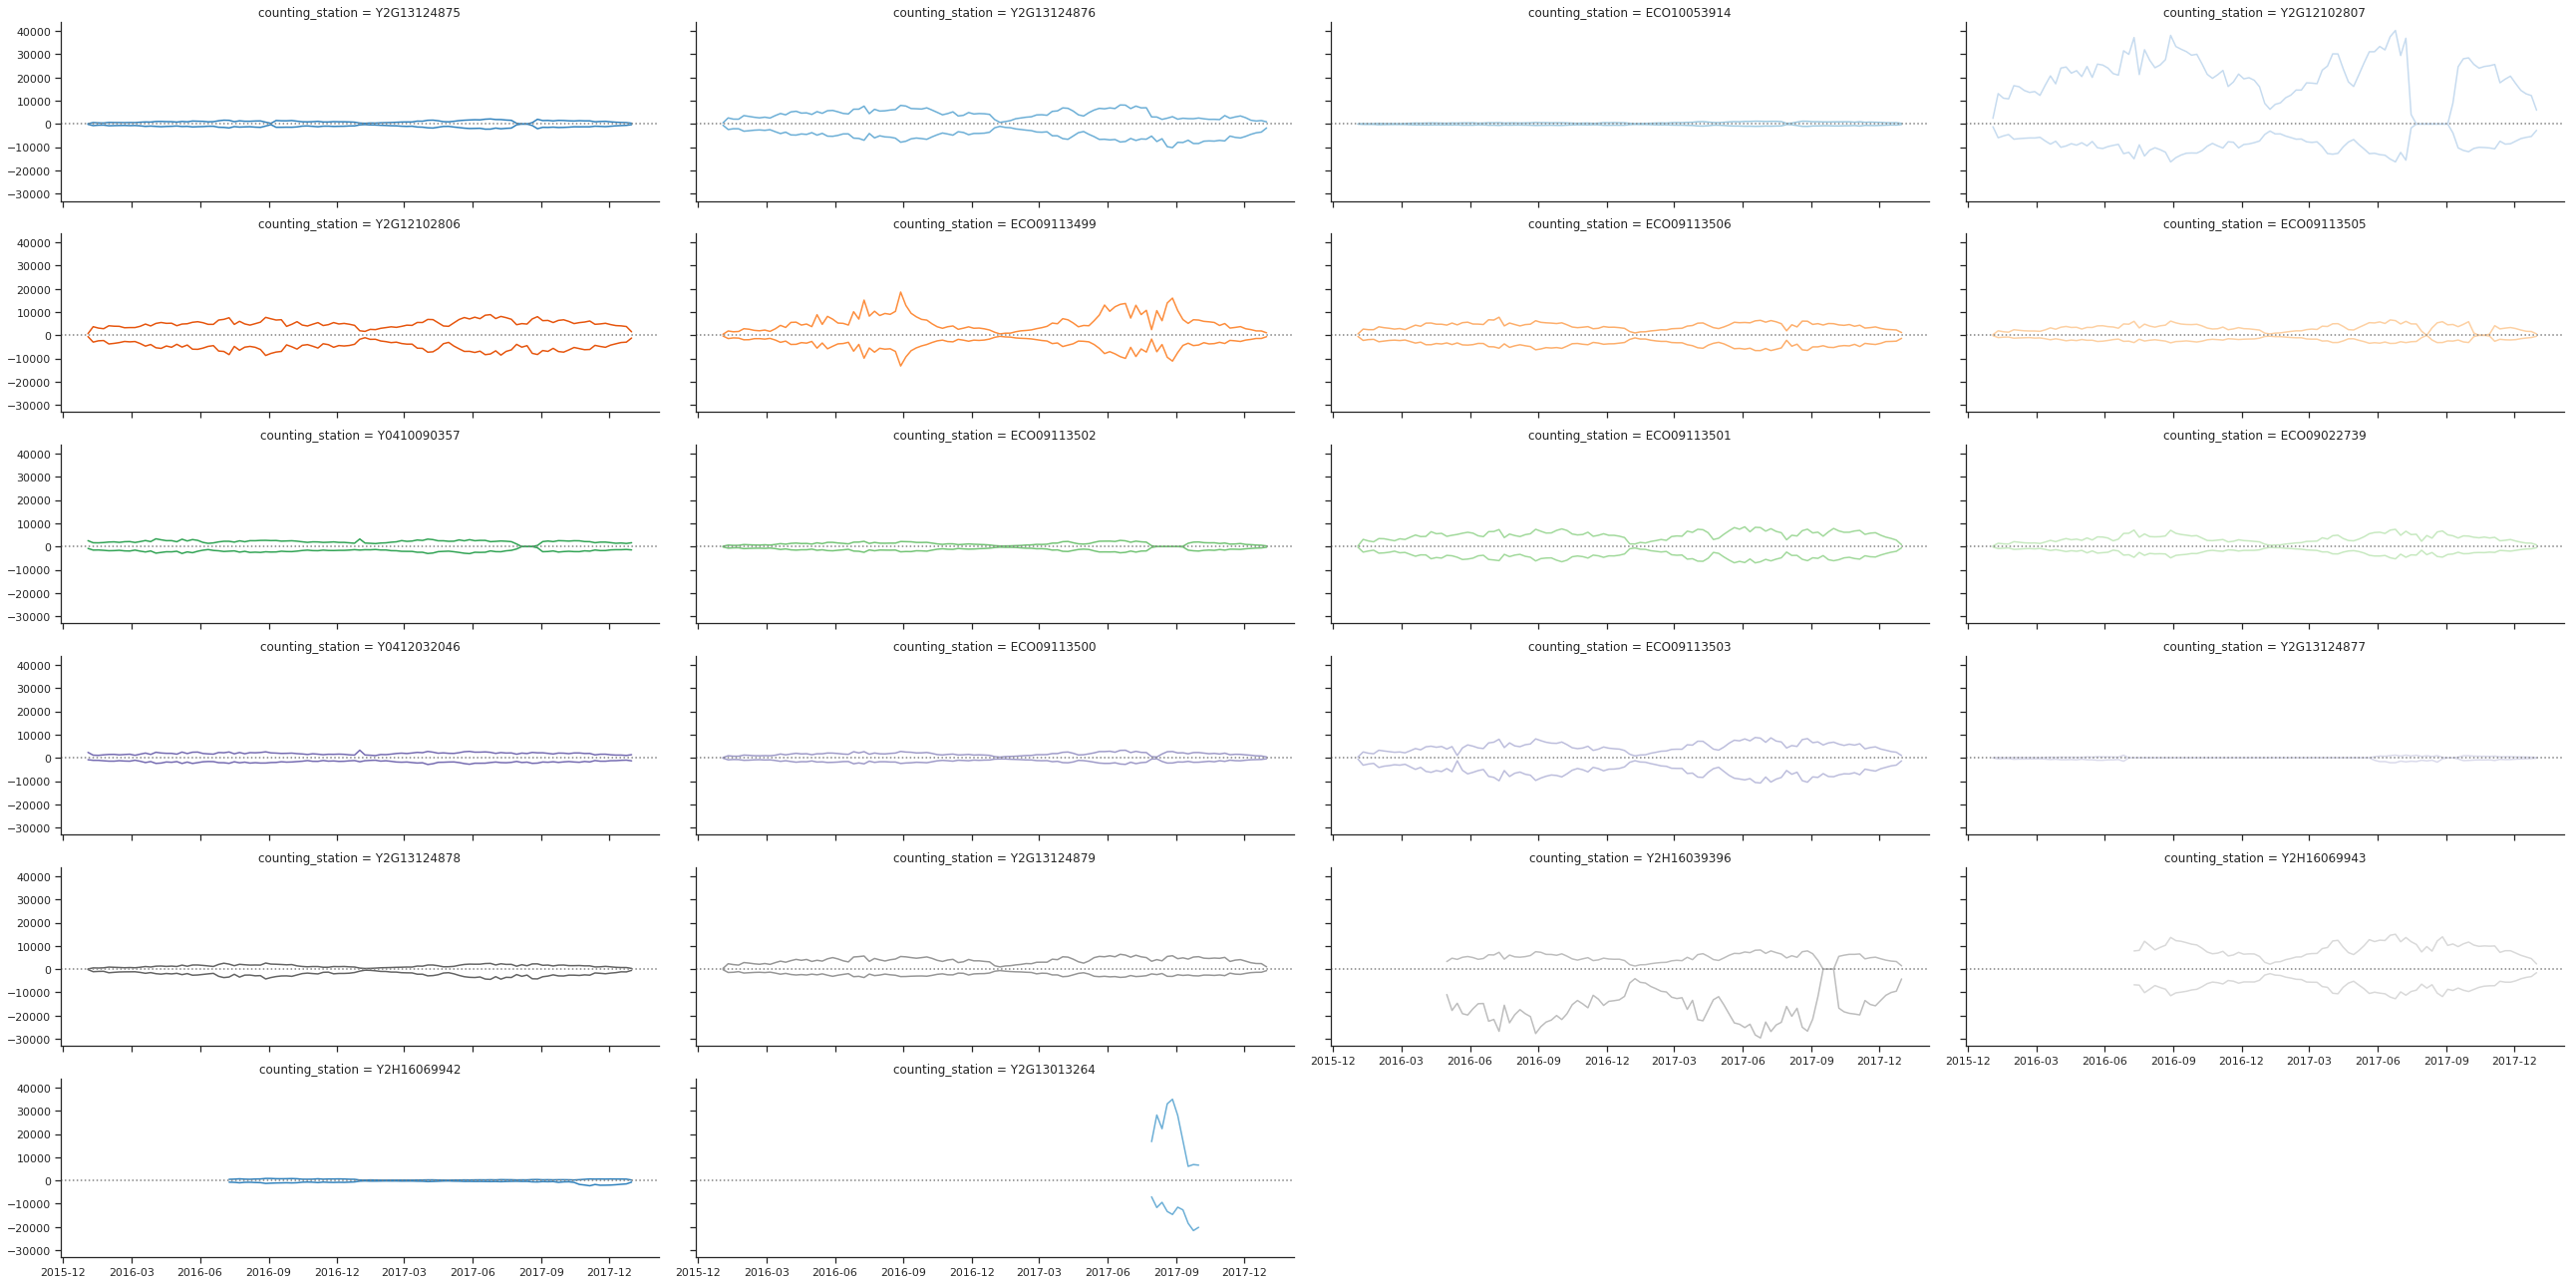

In [27]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(df_weekly, col="counting_station", hue="counting_station", palette="tab20c",
                     col_wrap=4, height=3, aspect=3)
grid.map(plt.plot, "datetime", "velo_in")
grid.map(plt.plot, "datetime", "velo_out")
grid.map(plt.axhline, y=0, ls=":", c=".5")


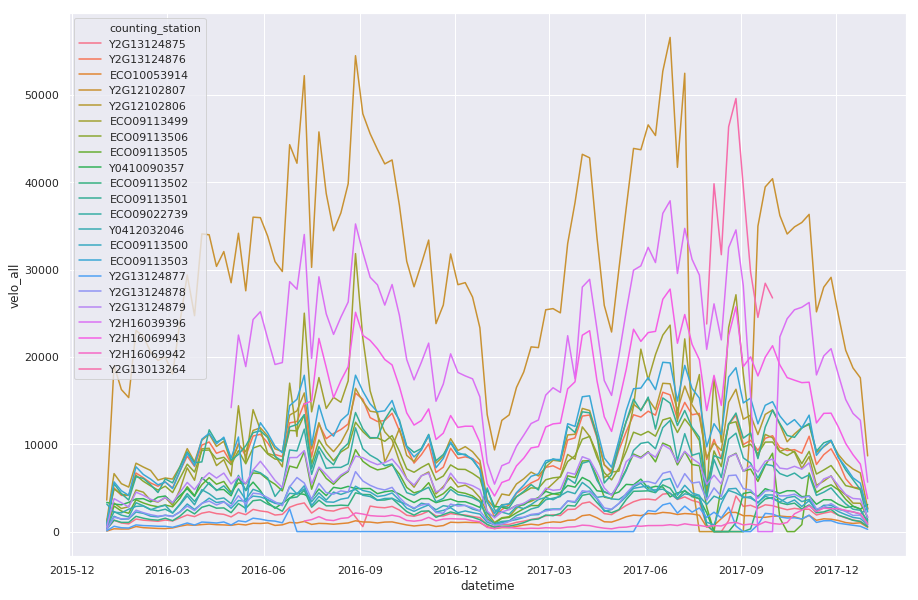

In [42]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.lineplot(x="datetime", y="velo_all", hue="counting_station", data=df_weekly)